In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width: 90% !important; }</style>'))

In [2]:
import sys
sys.path.append("../../simpsom")
import simpsom as sps

import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
labels = digits.target
data = np.array(df)

In [4]:
net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='cosine', random_seed=42, GPU=False, verbose=True)
net.train(train_algo='online', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='euclidean', random_seed=42, GPU=False, verbose=True)
net.train(train_algo='online', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='manhattan', random_seed=42, GPU=False, verbose=True)
net.train(train_algo='online', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

Periodic Boundary Conditions inactive.
The weights will be initialized with PCA.
The map will be trained with the online algorithm.
Warning, epochs for online training are less than the entry datapoints!
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialized with PCA.
The map will be trained with the online algorithm.
Warning, epochs for online training are less than the entry datapoints!
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialized with PCA.
The map will be trained with the online algorithm.
Warning, epochs for online training are less than the entry datapoints!
Training SOM... done!


In [5]:
net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='cosine', random_seed=42, GPU=False, verbose=True)
net.train(train_algo='batch', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='euclidean', random_seed=42, GPU=False, verbose=True)
net.train(train_algo='batch', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='manhattan', random_seed=42, GPU=False, verbose=True)
net.train(train_algo='batch', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

Periodic Boundary Conditions inactive.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Training SOM... done!


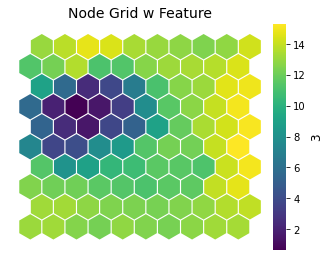

In [6]:
net.nodes_graph(colnum=3, show=True, print_out=False)

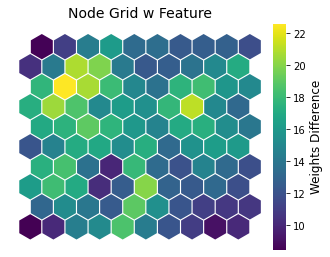

In [7]:
_ = net.diff_graph(show=True, print_out=False, returns=False)

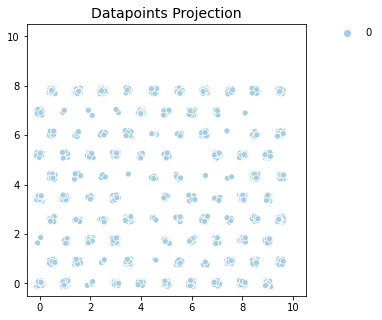

In [8]:
_ = net.project(data, labels=[0]*data.shape[0], show=True, print_out=False, returns=False)

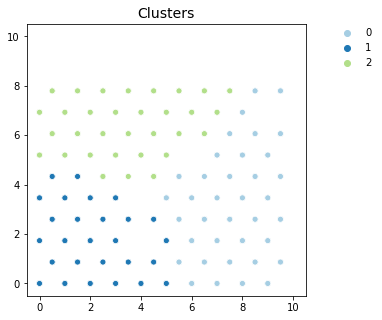

In [9]:
cls = net.cluster(data, clus_type='KMeans', num_cl=3, show=True, print_out=False, returns=True)

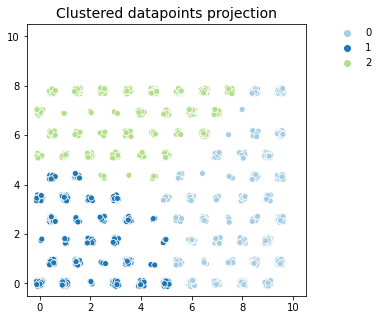

In [10]:
_ = net.project(data, labels=cls, show=True, print_out=False, returns=False, figtitle=('Clustered datapoints projection', 14))

In [11]:
net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='cosine', random_seed=42, GPU=False, verbose=True)
net.train(train_algo='batch', start_learning_rate=0.01, epochs=10, batch_size=-1, early_stop='mapdiff')

Periodic Boundary Conditions inactive.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Tolerance reached at epoch 4, stopping training.
Training SOM... done!


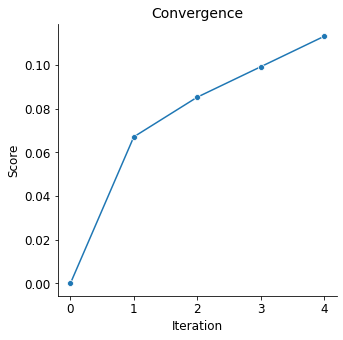

In [12]:
net.plot_convergence(fsize=(5, 5), logax=False)

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
labels = digits.target
data = np.array(df)

In [14]:
net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='cosine', random_seed=42, GPU=False, verbose=True, topology="rectangular")
net.train(train_algo='online', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='euclidean', random_seed=42, GPU=False, verbose=True, topology="rectangular")
net.train(train_algo='online', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='manhattan', random_seed=42, GPU=False, verbose=True, topology="rectangular")
net.train(train_algo='online', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

Periodic Boundary Conditions inactive.
The weights will be initialized with PCA.
The map will be trained with the online algorithm.
Warning, epochs for online training are less than the entry datapoints!
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialized with PCA.
The map will be trained with the online algorithm.
Warning, epochs for online training are less than the entry datapoints!
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialized with PCA.
The map will be trained with the online algorithm.
Warning, epochs for online training are less than the entry datapoints!
Training SOM... done!


In [15]:
net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='cosine', random_seed=42, GPU=False, verbose=True, topology="rectangular")
net.train(train_algo='batch', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='euclidean', random_seed=42, GPU=False, verbose=True, topology="rectangular")
net.train(train_algo='batch', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='manhattan', random_seed=42, GPU=False, verbose=True, topology="rectangular")
net.train(train_algo='batch', start_learning_rate=0.01, epochs=10, batch_size=-1) # train_algo='batch' #early_stop='mapdiff' #batch_size=-1

Periodic Boundary Conditions inactive.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Training SOM... done!


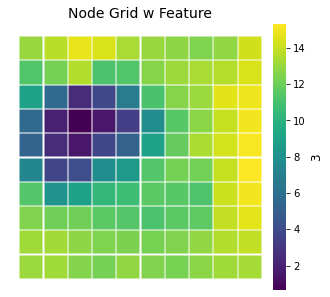

In [16]:
net.nodes_graph(colnum=3, show=True, print_out=False)

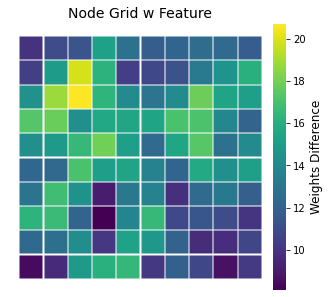

In [17]:
_ = net.diff_graph(show=True, print_out=False, returns=False)

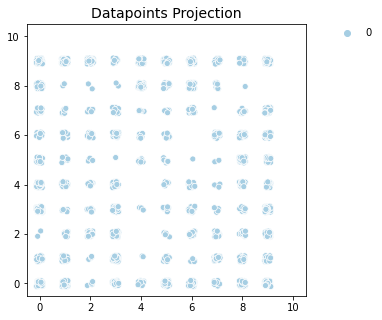

In [18]:
_ = net.project(data, labels=[0]*data.shape[0], show=True, print_out=False, returns=False)

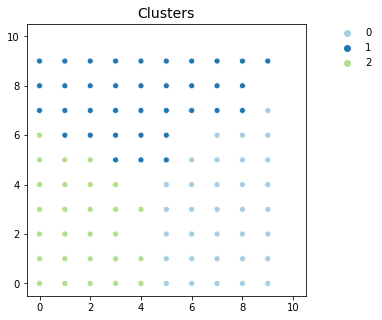

In [19]:
cls = net.cluster(data, clus_type='KMeans', num_cl=3, show=True, print_out=False, returns=True)

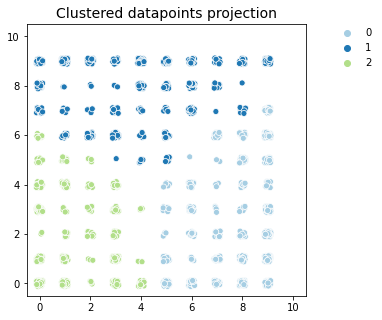

In [20]:
_ = net.project(data, labels=cls, show=True, print_out=False, returns=False, figtitle=('Clustered datapoints projection', 14))

In [21]:
net = sps.SOMNet(10, 10, data, PBC=False, init='PCA', metric='cosine', random_seed=42, GPU=False, verbose=True)
net.train(train_algo='batch', start_learning_rate=0.01, epochs=10, batch_size=-1, early_stop='mapdiff')

Periodic Boundary Conditions inactive.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Tolerance reached at epoch 4, stopping training.
Training SOM... done!


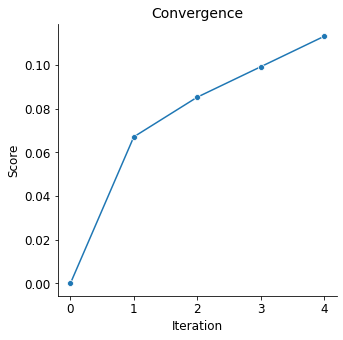

In [22]:
net.plot_convergence(fsize=(5, 5), logax=False)